In [0]:
## 3 Ways
# Load the data into the disk that is provided by Google
# You can load the data from Google Sheet
# You can load the data from some external cloud

from google.colab import files
uploaded  = files.upload()

Saving Attendance.xlsx to Attendance (1).xlsx


In [0]:
# Let's load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df = pd.read_excel('Attendance.xlsx')
df.head()

,DATE,COMPANY,Unnamed: 2,ROUND
0,July,NaN,NaN,NaN
1,2016-07-04 00:00:00,Category B Test,NaN,NaN
2,2016-07-11 00:00:00,CCD Traning,NaN,NaN
3,2016-07-12 00:00:00,CCD Traning,NaN,NaN
4,2016-07-14 00:00:00,Amazon,NaN,NaN


In [0]:
## Titanic: We will use titanic surival data to predict who survived and who didn't.
df = pd.read_csv("https://query.data.world/s/gb5wjsz5c76sgfyeas22h4loq7syqt")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
# EDA
# Data Cleaning: Iterative Imputer
# Data Preparation
# LR
# LR+Ridge and Lasso
# Elastic Net

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [0]:
# Percentage of missing
100*(df.isnull().sum()/df.shape[0])

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [0]:
df['Fare'].quantile(0.75)

31.0

In [0]:
## Describe to check percentile
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [0]:
# Out of the total passengers, what is the percentage of females those survived the incident?
pd.crosstab(df.Survived, df.Sex, normalize=True)

Sex,female,male
Survived,,
0,0.090909,0.525253
1,0.261504,0.122334


In [0]:
# Now bucket the age variable into 4 groups defined as: 
# "Age" <= 16: 0
# > 16  & <= 32 :1
# > 32 & <= 48 :2
# > 48 & <= 64 :3
# "Age" > 64 :4
# Question-5: Which age group survived the most?
df['Age_group'] = pd.cut(df.Age, bins = [0,16,32,48,64,200], labels = [0,1,2,3,4])

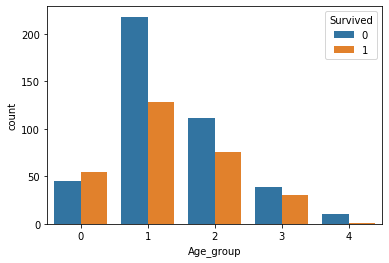

In [0]:
sns.countplot("Age_group", hue = "Survived", data = df)

In [0]:
df.drop('Age_group', axis =1, inplace = True)

In [0]:
## Missing Value Treatment
# Percentage of missing
100*(df.isnull().sum()/df.shape[0])


PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [0]:
# Drop Cabin columns
df.drop('Cabin', axis =1, inplace = True)

In [0]:
# Percentage of missing
100*(df.isnull().sum()/df.shape[0])

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Embarked        0.224467
dtype: float64

In [0]:
# Question-6: Check the Embarked variable, which of the following category has the highest count?
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [0]:
## Impute S for missing at Embarked columns
df.Embarked = df.Embarked.fillna('S')

In [0]:
# Percentage of missing
100*(df.isnull().sum()/df.shape[0])

PassengerId     0.00000
Survived        0.00000
Pclass          0.00000
Name            0.00000
Sex             0.00000
Age            19.86532
SibSp           0.00000
Parch           0.00000
Ticket          0.00000
Fare            0.00000
Embarked        0.00000
dtype: float64

In [0]:
## Iterative Imputer
df.drop(['PassengerId', 'Name', 'Ticket'], inplace = True, axis = 1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [0]:
# Replace Sex columns
df.Sex.replace(['female', 'male'], [0,1], inplace = True)

In [0]:
## Label Encoder on Embarked Varibale
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df.Embarked = le.fit_transform(df.Embarked)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [0]:
## I will create dummies before proceeding for logistic rergression
## Only for Iterative Imputer
## High medium and low: 3,2,1-- Lable Encoding
## Male Female other-- Dummies

In [0]:
# %pip install fancyimpute
from fancyimpute import IterativeImputer

In [0]:
# Preserve the column names
df_col = df.columns

In [0]:
df_clean = pd.DataFrame(IterativeImputer().fit_transform(df))
df_clean.columns = df_col
df_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500,2.0
1,1.0,1.0,0.0,38.0,1.0,0.0,71.2833,0.0
2,1.0,3.0,0.0,26.0,0.0,0.0,7.9250,2.0
3,1.0,1.0,0.0,35.0,1.0,0.0,53.1000,2.0
4,0.0,3.0,1.0,35.0,0.0,0.0,8.0500,2.0


In [0]:
for i in ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch','Embarked']:
  df_clean[i] = pd.to_numeric(df_clean[i])
  df_clean[i] = df_clean[i].astype(int)

In [0]:
df_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [0]:
# Percentage of missing
100*(df_clean.isnull().sum()/df_clean.shape[0])

Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Embarked    0.0
dtype: float64

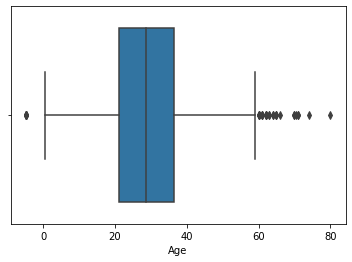

In [0]:
# Question-8: Check the outliers in the “Age” variable, Is there any outliers?
sns.boxplot(df_clean.Age)

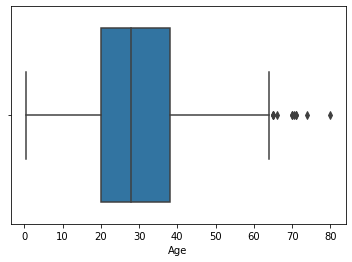

In [0]:
sns.boxplot(df.Age)

In [0]:
# Let's remove the -ve age
df_clean.drop(df_clean.index[df_clean.Age<0], inplace = True)

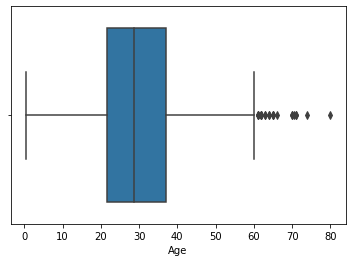

In [0]:
sns.boxplot(df_clean.Age)

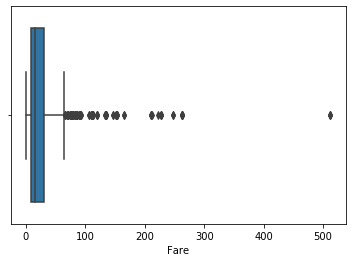

In [0]:
# Question-11: Check Fare variable, is there any outliers in the fare variable?
sns.boxplot(df_clean.Fare)

In [0]:
# Drop the row that have fare greater than 300

df_clean.drop(df_clean.index[df_clean.Fare>300], inplace = True)

In [0]:
df.Fare.quantile(0.90)

77.9583

In [0]:
## Data Preparation
## Create Dummies for all the cat columns
## Split Data into Train Test
## Scaling

In [0]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 881 entries, 0 to 890
Data columns (total 8 columns):
Survived    881 non-null int64
Pclass      881 non-null int64
Sex         881 non-null int64
Age         881 non-null float64
SibSp       881 non-null int64
Parch       881 non-null int64
Fare        881 non-null float64
Embarked    881 non-null int64
dtypes: float64(2), int64(6)
memory usage: 61.9 KB


In [0]:
# This required my cat data in String format(object)
# Let's convert all the cat data into string or object
for i in ['Pclass', 'SibSp', 'Parch','Embarked']:
  df_clean[i] = df_clean[i].astype(str)

In [0]:
cat_data = df_clean[['Pclass', 'SibSp', 'Parch','Embarked']]

In [0]:
df_dummies = pd.get_dummies(cat_data, drop_first=True)
df_dummies.head()

,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_1,Embarked_2
0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [0]:
df_clean.drop(list(cat_data.columns), axis = 1, inplace = True)
df_clean = pd.concat([df_clean, df_dummies], axis = 1)
df_clean.head()

,Survived,Sex,Age,Fare,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_1,Embarked_2
0,0,1,22.0,7.2500,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,38.0,71.2833,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,26.0,7.9250,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,35.0,53.1000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,0,1,35.0,8.0500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [0]:
# Split Data into Train - Test
X = df_clean.drop('Survived', axis = 1)
y = df_clean.Survived

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100)

In [0]:
## Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [0]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
## Modellling Part
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [0]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print("Accuracy : {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Sensitivity/Recall : {0}".format(metrics.recall_score(y_test, y_pred)))

Accuracy : 0.8075471698113208
Sensitivity/Recall : 0.7254901960784313


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
logreg = LogisticRegression(penalty='l1')
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print("Accuracy : {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Sensitivity/Recall : {0}".format(metrics.recall_score(y_test, y_pred)))

Accuracy : 0.8075471698113208
Sensitivity/Recall : 0.7254901960784313


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
# Lambda?? -- Regularization: Control How much reg. you want to put into your cost function
## Theory: Higher value of lambda--- Higher regularisation
## Python: A smaller value means a higher regulrisation

In [0]:
logreg = LogisticRegression(penalty='l1', C = 0.1)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print("Accuracy : {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Sensitivity/Recall : {0}".format(metrics.recall_score(y_test, y_pred)))

Accuracy : 0.8188679245283019
Sensitivity/Recall : 0.7058823529411765


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
## Class_weight = =Class_imbalace
100*(df_clean.Survived.value_counts()/ df_clean.shape[0])

0    61.520999
1    38.479001
Name: Survived, dtype: float64

In [0]:
logreg = LogisticRegression(penalty='l1', C = 0.1, class_weight = 'balanced')
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print("Accuracy : {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Sensitivity/Recall : {0}".format(metrics.recall_score(y_test, y_pred)))

Accuracy : 0.7924528301886793
Sensitivity/Recall : 0.7549019607843137


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
## We can try range of C: GridSearch
from sklearn.model_selection import GridSearchCV
param = {'C': [0.0001, 0.001,0.005, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.9, 1], 'penalty': ['l1', 'l2']}
logr = LogisticRegression(class_weight = 'balanced')
model = GridSearchCV(estimator = logr, cv = 5, param_grid = param, scoring = 'recall')
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.005, 0.01, 0.1, 0.2, 0.3, 0.4,
                               0.5, 0.6, 0.9, 1],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

In [0]:
model.best_score_

0.8018530671456203

In [0]:
model.best_params_

{'C': 0.3, 'penalty': 'l1'}

In [0]:
logreg = LogisticRegression(penalty='l1', C = 0.3, class_weight = 'balanced')
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print("Accuracy : {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Sensitivity/Recall : {0}".format(metrics.recall_score(y_test, y_pred)))

Accuracy : 0.7811320754716982
Sensitivity/Recall : 0.7549019607843137


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
## ElastiNet
## Combines -- Ridge and Lasso
## Ridge = =Tries to shrik the coefficient but not maked it to 0
## Lasso == Shrikes and also reduce some coefficients to 0
## Elastic Net: So many features+ important features
logreg = LogisticRegression(penalty='elasticnet', C = 0.1, l1_ratio = 0.2, class_weight = 'balanced', solver = 'saga')
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print("Accuracy : {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Sensitivity/Recall : {0}".format(metrics.recall_score(y_test, y_pred)))


Accuracy : 0.7962264150943397
Sensitivity/Recall : 0.7549019607843137
